## 機械学習  
1. 概要  
2. データ分析  
3. 機械学習  

[開発言語]  
⇒ 機械学習やデータ分析用のライブラリが充実しているPythonを採用  
  
[開発環境]  
⇒ データの入出力、グラフ描画に適したJupyterを採用

[1.概要]  
今回の発表のテーマは _機械学習_ です。サンプルデータを人工知能に学習させ、_新規データの結果を予測_ させます。

機械学習についての概要については、下記のサイトから資料を引用し、説明します。
http://www.slideshare.net/unnonouno/jubatus-casual-talks

![Machine_Learning_Slide_1](https://i.imgur.com/nlbnOrd.jpg)
![Machine_Learning_Slide_2](https://i.imgur.com/4o5MKTK.jpg)

今回は、上記資料の _分類_ に該当する分野を実践します。
![Machine_Learning_Slide_3](https://i.imgur.com/AjvGdxg.jpg)

上記資料で「髪型」や「服装」など、推定対象に対して判断材料となる要素を_「説明変数」_と定義します。

また、推定対象の要素、資料上の「性別」を_「目的変数」_と定義します。

人工知能にサンプルデータを学習させ、_「説明変数」_から_「目的変数」_を予測するパターンを作成します。

今回は、アメリカのテキサス州にあるAustin Animal Centerという動物保護施設のデータを扱います。

施設で保護された犬や猫が、「持ち主に返還」や「養子になる」など、どのような結末に至ったかを分析します。

データを分析して得られた、_結果に関連性のある項目_ を抽出し、説明変数に格納します。

![kaggle_Shelter_Animal_Outcomes_Competition_Details](https://i.imgur.com/oiivmo9.jpg)

kaggleは個人やチーム、企業が競うデータ分析、機械学習のフォーラムです。

トップスコアを出せば賞金が貰える課題もあるそうです。

In [4]:
#データの編集に必要なライブラリをインポート
import pandas as pd

In [5]:
#Kaggleから取得した学習用CSVファイルをtrainという変数に格納する
train = pd.read_csv('./train.csv')

In [6]:
#pandasライブラリを経由し、DataFrame型のデータを扱う
#DataFrame型は行列で扱うデータの集合のようなもの
type(train)

pandas.core.frame.DataFrame

In [7]:
#出力したCSVファイルをブラウザ上で閲覧
train.tail(10)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
26719,A707871,NaN,2015-07-20 09:00:00,Transfer,SCRP,Cat,Unknown,2 years,Domestic Shorthair Mix,Brown Tabby/White
26720,A704405,Brownie,2015-07-18 14:08:00,Adoption,NaN,Cat,Spayed Female,2 months,Domestic Shorthair Mix,Brown Tabby
26721,A662019,Green Bean,2014-07-17 09:43:00,Adoption,Foster,Cat,Spayed Female,5 years,Domestic Shorthair Mix,Black
26722,A687056,NaN,2014-08-31 09:00:00,Transfer,SCRP,Cat,Intact Male,5 months,Domestic Shorthair Mix,Orange Tabby
26723,A716997,Zeus,2016-01-29 18:52:00,Adoption,NaN,Dog,Neutered Male,6 years,Staffordshire Mix,Blue/White
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black
26728,A706629,NaN,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White


1行のデータは[AnimalID]や[Name]など、複数の項目を属性として持っています。

また、今回の目的である[OutcomeType]、結末は下記の5種類に分類されています。

[Return_to_owner] ⇒ 持ち主に返還

[Adoption]        ⇒ 養子になる

[Transfer]        ⇒ 別の保護施設に移転する

[Euthanasia]      ⇒ 安楽死

[Died]            ⇒ 衰弱死、病死

In [8]:
#Kaggleから取得したテスト用CSVファイルをtestという変数に格納する
test = pd.read_csv('./test.csv')

In [9]:
type(test)

pandas.core.frame.DataFrame

In [10]:
#出力したCSVファイルをブラウザ上で閲覧
test.tail(10)

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
11446,11447,NaN,2015-07-19 20:03:00,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
11447,11448,Sadie,2014-10-19 12:21:00,Dog,Spayed Female,1 year,Chihuahua Longhair Mix,Orange/Tan
11448,11449,NaN,2014-08-17 17:48:00,Dog,Spayed Female,2 months,Labrador Retriever Mix,Brown
11449,11450,Caicos,2015-07-20 14:55:00,Dog,Spayed Female,6 months,Bearded Collie Mix,Blue Merle/White
11450,11451,Cosmo,2015-11-05 17:19:00,Dog,Neutered Male,10 months,Staffordshire Mix,Tan/White
11451,11452,NaN,2014-07-08 14:50:00,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
11452,11453,NaN,2014-10-21 12:57:00,Cat,Intact Female,2 weeks,Domestic Shorthair Mix,Blue
11453,11454,NaN,2014-09-29 09:00:00,Cat,Intact Female,1 year,Domestic Shorthair Mix,Calico
11454,11455,Rambo,2015-09-05 17:16:00,Dog,Neutered Male,6 years,German Shepherd Mix,Black/Tan
11455,11456,Gusto,2014-07-12 18:40:00,Dog,Intact Male,4 years,Labrador Retriever,Cream


テスト用のデータです。

このtest.csvの情報を分類パターンに適用し、OutcomeTypeを予測させます。

以上が発表の概要となります。

[2.データ分析]

学習用のデータを分析し、機械学習の説明変数に設定すべき項目を選定します。

下記サイトに分析用のソースコードが公開されているので、引用します。

https://www.kaggle.com/unicorn23/shelter-animal-outcomes/data-overview

まずはデータの全体像を把握するため、犬と猫それぞれの結末を分けた棒グラフを描画します。

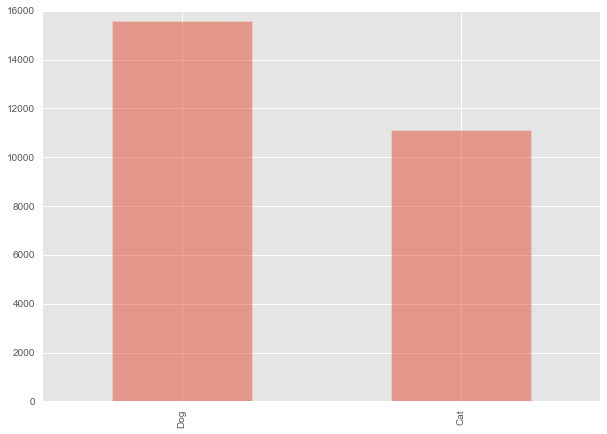

In [11]:
#データの編集、描画に必要なライブラリをインポート

#データの可視化ツール
import seaborn as sns

import matplotlib

#描画したグラフをブラウザに埋め込むコマンド
%matplotlib inline


import numpy as np
import pandas as pd


matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10, 7)
from pandas.tools.plotting import scatter_matrix

df = pd.read_csv("./train.csv",index_col=0)
df = df.fillna('NA')
df_dog = df.loc[df['AnimalType'] == 'Dog']
df_cat = df.loc[df['AnimalType'] == 'Cat']
df['AnimalType'].value_counts().plot(kind='bar',alpha=0.5)

このデータを [OutcomeType] 毎に分けて描画します。

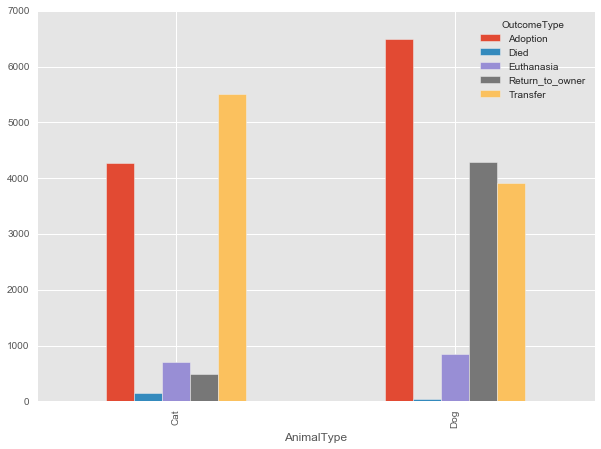

In [12]:
df[['AnimalType','OutcomeType']].groupby(['AnimalType','OutcomeType']).size().unstack().plot.bar()

結末毎の、犬と猫による総数の差を描画します。

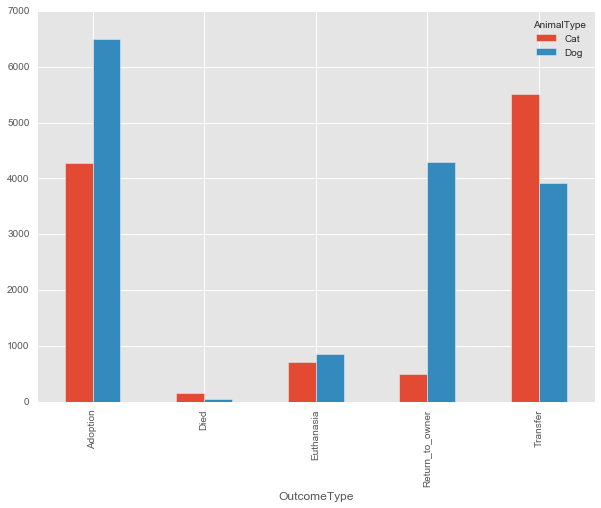

In [13]:
df[['AnimalType','OutcomeType']].groupby(['OutcomeType','AnimalType']).size().unstack().plot.bar()

このグラフから、以下の内容が読み取れます。

[Adoption],[Transfer],[Return_to_owner]  
⇒ 持ち主に返すケースについて、犬は4000件を超えていますが、猫だと500件以下だということが分かります。

[Euthanasia],[Died]  
⇒ 死亡するケースは少なく、特に犬の死亡数は殆んど計上されない。  

⇒ 犬と猫のいずれに属するか、[動物の種類] という項目と結末に関連性がある。  

次に、[動物の年齢] についてデータを分析します。

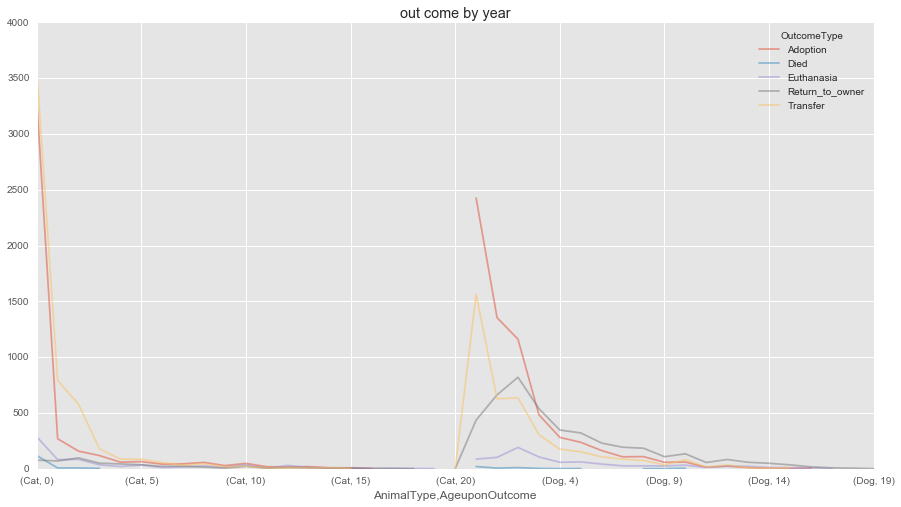

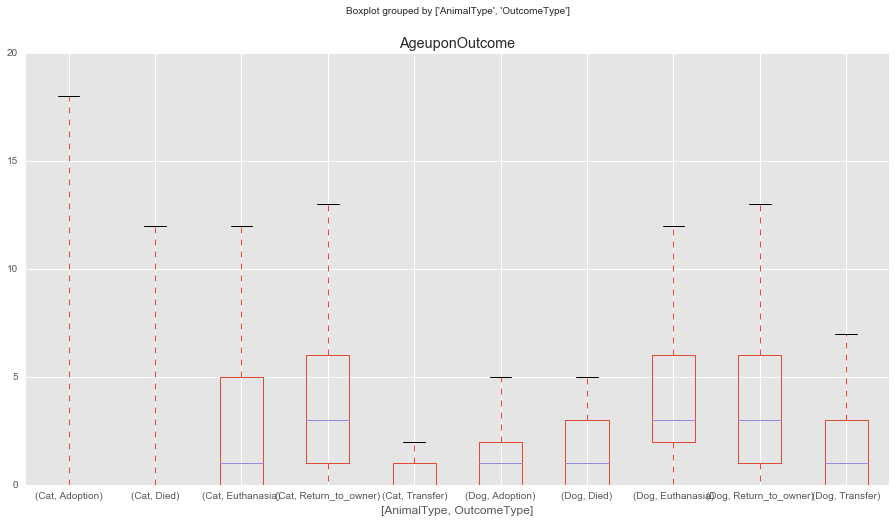

In [16]:
df = pd.read_csv("./train.csv",index_col=0)
df = df.fillna('NA')
AgeuponOutcomemapping = {'year' : 1, 'month' : 12 ,'week': 54,'years' : 1,'months' : 12,'weeks': 54,'days':360,'day' : 360}
def change_AgeuponOutcome_to_years(value):
    if "weeks" in value:
        value = int(value.replace("weeks","")) / AgeuponOutcomemapping['weeks']
    elif "years" in value: 
        value = int(value.replace("years","")) / AgeuponOutcomemapping['years'] 
    elif "months" in value: 
        value = int(value.replace("months","")) / AgeuponOutcomemapping['months'] 
    elif "week" in value:
        value = int(value.replace("week","")) / AgeuponOutcomemapping['week'] 
    elif "year" in value:
        value = int(value.replace("year","")) / AgeuponOutcomemapping['year'] 
    elif "month" in value:
        value = int(value.replace("month","")) / AgeuponOutcomemapping['month'] 
    elif "days" in value:
        value = int(value.replace("days","")) / AgeuponOutcomemapping['days'] 
    elif "day" in value:
        value = int(value.replace("day","")) / AgeuponOutcomemapping['day'] 
    else:
        value = 0
    
    return int(value)
  
df['AgeuponOutcome'] = df['AgeuponOutcome'].dropna()
df['AgeuponOutcome'] = df['AgeuponOutcome'].apply(change_AgeuponOutcome_to_years)
df[['AnimalType','AgeuponOutcome','OutcomeType']].groupby(['AnimalType','AgeuponOutcome','OutcomeType']).size().unstack().plot(alpha=0.5,title="out come by year")

matplotlib.rcParams['figure.figsize'] = (15, 8)
df = pd.read_csv("./train.csv",index_col=0)
df = df.fillna('NAN')
df['AgeuponOutcome'] = df['AgeuponOutcome'].dropna()
df['AgeuponOutcome'] = df['AgeuponOutcome'].apply(change_AgeuponOutcome_to_years)
df[['OutcomeType','AgeuponOutcome','AnimalType']].boxplot(by=['AnimalType','OutcomeType'])

このグラフから、以下の内容が読み取れます。

年齢の増加に比例して、[Adoption],[Return_to_owner],[Transfer]となるデータの件数は減少する。

⇒ [動物の年齢] という項目と結末に関連性がある。

次に、[去勢手術の有無] についてデータを分析します。

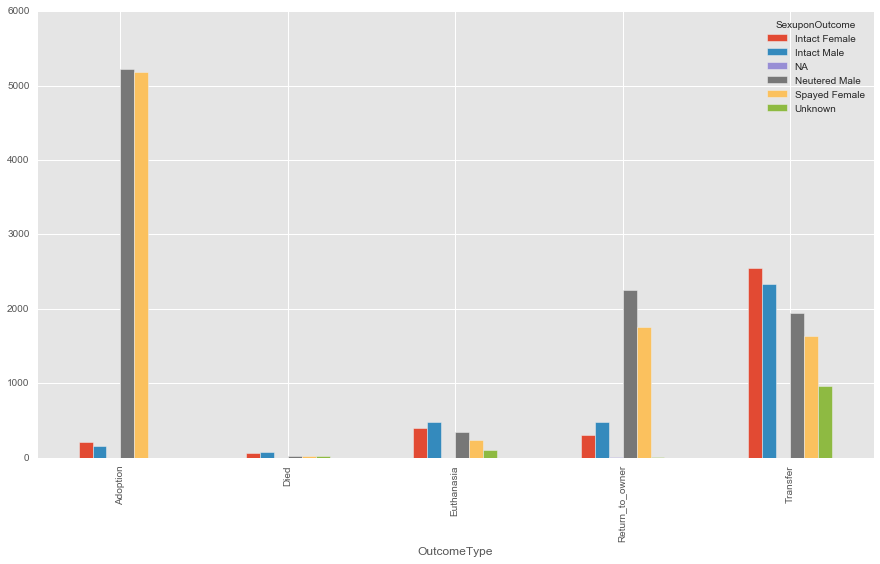

In [17]:
df = pd.read_csv("./train.csv",index_col=0)
df = df.fillna('NA')
df[['SexuponOutcome','OutcomeType']].groupby(['OutcomeType','SexuponOutcome']).size().unstack().plot.bar()

下記サイトのソースコードも引用します。

https://www.kaggle.com/izzul02/shelter-animal-outcomes/age-gender-breed-and-name-vs-outcome

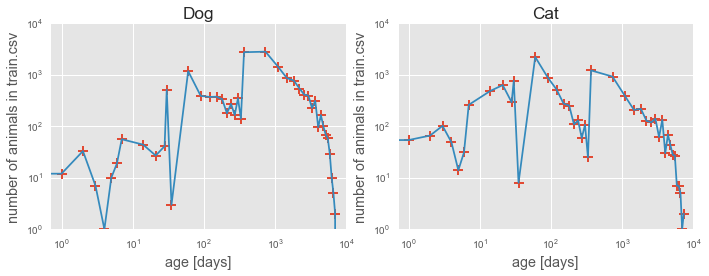

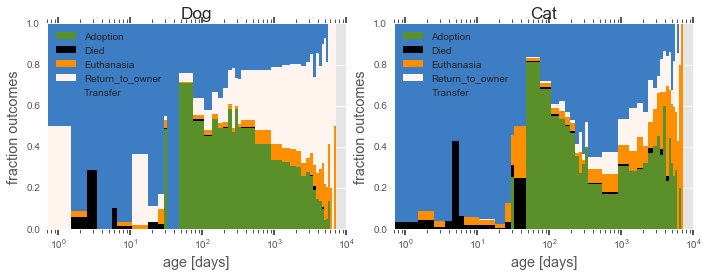

In [18]:
# Question 1: What fraction of animals end up with the various outcomes as a function of the animal's age?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#matplotlib inline
matplotlib.rcParams.update({'font.size': 12})
# Function to convert age to days:
def age_to_days(item):
    # convert item to list if it is one string
    if type(item) is str:
        item = [item]
    ages_in_days = np.zeros(len(item))
    for i in range(len(item)):
        # check if item[i] is str
        if type(item[i]) is str:
            if 'day' in item[i]:
                ages_in_days[i] = int(item[i].split(' ')[0])
            if 'week' in item[i]:
                ages_in_days[i] = int(item[i].split(' ')[0])*7
            if 'month' in item[i]:
                ages_in_days[i] = int(item[i].split(' ')[0])*30
            if 'year' in item[i]:
                ages_in_days[i] = int(item[i].split(' ')[0])*365    
        else:
            # item[i] is not a string but a nan
            ages_in_days[i] = 0
    return ages_in_days
# Load the data:
df = pd.read_csv('./train.csv', sep=',')

feature = 'AgeuponOutcome'
feature_values_dog = np.array(df.loc[df['AnimalType'] == 'Dog',feature])
outcome_dog = np.array(df.loc[df['AnimalType'] == 'Dog','OutcomeType'])

feature_values_cat = np.array(df.loc[df['AnimalType'] == 'Cat',feature])
outcome_cat = np.array(df.loc[df['AnimalType'] == 'Cat','OutcomeType'])
# Calculate the fractions of outcomes:
ages_dog = age_to_days(feature_values_dog)
ages_cat = age_to_days(feature_values_cat)

unique_ages = np.unique(np.append(ages_dog,ages_cat))
unique_outcomes = np.unique(np.append(outcome_dog,outcome_cat))

fractions_cat = np.zeros([len(unique_ages),len(unique_outcomes)])
fractions_dog = np.zeros([len(unique_ages),len(unique_outcomes)])
nr_animals_with_age_dog = np.zeros(len(unique_ages))
nr_animals_with_age_cat = np.zeros(len(unique_ages))

for i in range(len(unique_ages)):
    for j in range(len(unique_outcomes)):
        sublist_dog = outcome_dog[ages_dog == unique_ages[i]]  
        if len(sublist_dog) > 0:
            fractions_dog[i,j] = 1e0*len(sublist_dog[sublist_dog == unique_outcomes[j]]) / len(sublist_dog)
        else:
            fractions_dog[i,j] = 0e0
        sublist_cat = outcome_cat[ages_cat == unique_ages[i]]        
        fractions_cat[i,j] = 1e0*len(sublist_cat[sublist_cat == unique_outcomes[j]]) / len(sublist_cat)
        
    nr_animals_with_age_dog[i] = len(sublist_dog)
    nr_animals_with_age_cat[i] = len(sublist_cat)
# Figures:
# nr of animals vs age
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.title('Dog')
plt.plot(unique_ages,nr_animals_with_age_dog,'+',markersize=10,mew=2)
plt.plot(unique_ages,nr_animals_with_age_dog)
plt.xlim([0.7,1e4])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('age [days]')
plt.ylabel('number of animals in train.csv')
plt.tight_layout(w_pad=0, h_pad=0)

plt.subplot(1, 2, 2)
plt.title('Cat')
plt.plot(unique_ages,nr_animals_with_age_cat,'+',markersize=10,mew=2)
plt.plot(unique_ages,nr_animals_with_age_cat)
plt.xlim([0.7,1e4])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('age [days]')
plt.ylabel('number of animals in train.csv')
plt.tight_layout(w_pad=0, h_pad=0)
plt.savefig('age-vs-nr_points.jpg',dpi=150)
plt.show()
plt.close()

# fraction of outcomes

ages_for_axis = np.append(unique_ages,age_to_days('20 years'))

left = (ages_for_axis[1:-1] + ages_for_axis[:-2])/2e0
right = (ages_for_axis[1:-1] + ages_for_axis[2:])/2e0
width = right-left

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.title('Dog')
plt.xlabel('age [days]')
plt.ylabel('fraction outcomes')
plt.xscale('log')
plt.xlim([0.7,1e4])
plt1 = plt.bar(left, fractions_dog[1:,0], width,color='#5A8F29',edgecolor='none')
plt2 = plt.bar(left, fractions_dog[1:,1], width,color='k',bottom = np.sum(fractions_dog[1:,:1],axis=1),edgecolor='none')
plt3 = plt.bar(left, fractions_dog[1:,2], width,color='#FF8F00',bottom = np.sum(fractions_dog[1:,:2],axis=1),edgecolor='none')
plt4 = plt.bar(left, fractions_dog[1:,3], width,color='#FFF5EE',bottom = np.sum(fractions_dog[1:,:3],axis=1),edgecolor='none')
plt5 = plt.bar(left, fractions_dog[1:,4], width,color='#3C7DC4',bottom = np.sum(fractions_dog[1:,:4],axis=1),edgecolor='none')
plt.legend([plt1,plt2,plt3,plt4,plt5],unique_outcomes,loc=2,fontsize=10)
plt.tight_layout(w_pad=0, h_pad=0)
plt.tick_params(axis='x', length=6, which='major',width=2)
plt.tick_params(axis='x', length=4, which='minor',width=1)
plt.minorticks_on()
plt.tight_layout(w_pad=0, h_pad=0)

plt.subplot(1, 2, 2)
plt.title('Cat')
plt.xlabel('age [days]')
plt.ylabel('fraction outcomes')
plt.xscale('log')
plt.xlim([0.7,1e4])
plt1 = plt.bar(left, fractions_cat[1:,0], width,color='#5A8F29',edgecolor='none')
plt2 = plt.bar(left, fractions_cat[1:,1], width,color='k',bottom = np.sum(fractions_cat[1:,:1],axis=1),edgecolor='none')
plt3 = plt.bar(left, fractions_cat[1:,2], width,color='#FF8F00',bottom = np.sum(fractions_cat[1:,:2],axis=1),edgecolor='none')
plt4 = plt.bar(left, fractions_cat[1:,3], width,color='#FFF5EE',bottom = np.sum(fractions_cat[1:,:3],axis=1),edgecolor='none')
plt5 = plt.bar(left, fractions_cat[1:,4], width,color='#3C7DC4',bottom = np.sum(fractions_cat[1:,:4],axis=1),edgecolor='none')
plt.legend([plt1,plt2,plt3,plt4,plt5],unique_outcomes,loc=2,fontsize=10)
plt.tight_layout(w_pad=0, h_pad=0)
plt.tick_params(axis='x', length=6, which='major',width=2)
plt.tick_params(axis='x', length=4, which='minor',width=1)
plt.minorticks_on()
plt.tight_layout(w_pad=0, h_pad=0)
plt.savefig('age-vs-outcome.jpg',dpi=150)
plt.show()
plt.close()
# - Young dogs (older than a month) are likely adopted.
# - Old dogs are likely returned to their owner.
# - Young (older than a month) and old cats are likely adopted.
# - Old cats are likely euthanised.


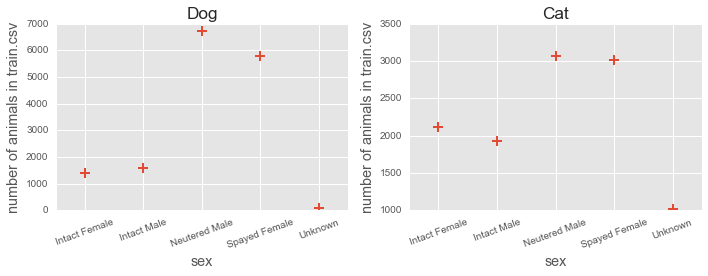

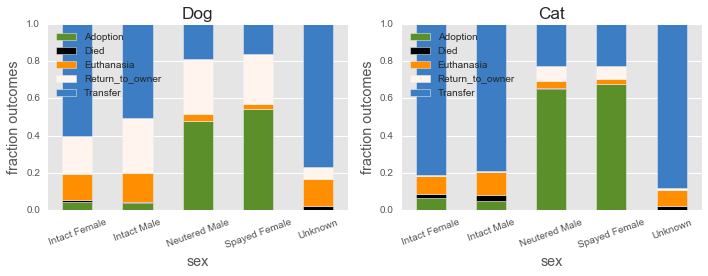

In [19]:
# Question 2: What fraction of animals end up adopted/euthanised etc. vs. their gender?
feature = 'SexuponOutcome'

feature_values_dog = np.array(df.loc[df['AnimalType'] == 'Dog',feature])
outcome_dog = np.array(df.loc[df['AnimalType'] == 'Dog','OutcomeType'])

feature_values_cat = np.array(df.loc[df['AnimalType'] == 'Cat',feature])
outcome_cat = np.array(df.loc[df['AnimalType'] == 'Cat','OutcomeType'])

unique_sexes = np.unique(feature_values_cat)
unique_outcomes = np.unique(np.append(outcome_dog,outcome_cat))

fractions_cat = np.zeros([len(unique_sexes),len(unique_outcomes)])
fractions_dog = np.zeros([len(unique_sexes),len(unique_outcomes)])
nr_animals_with_sex_dog = np.zeros(len(unique_sexes))
nr_animals_with_sex_cat = np.zeros(len(unique_sexes))

for i in range(len(unique_sexes)):
    for j in range(len(unique_outcomes)):
        sublist_dog = outcome_dog[feature_values_dog == unique_sexes[i]]  
        if len(sublist_dog) > 0:
            fractions_dog[i,j] = 1e0*len(sublist_dog[sublist_dog == unique_outcomes[j]]) / len(sublist_dog)
        else:
            fractions_dog[i,j] = 0e0
        sublist_cat = outcome_cat[feature_values_cat == unique_sexes[i]]        
        fractions_cat[i,j] = 1e0*len(sublist_cat[sublist_cat == unique_outcomes[j]]) / len(sublist_cat)
        
    nr_animals_with_sex_dog[i] = len(sublist_dog)
    nr_animals_with_sex_cat[i] = len(sublist_cat)
    
# Plots:

# nr of animals with given sexes

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.title('Dog')
plt.xlim([-0.5,4.5])
plt.plot(range(len(unique_sexes)),nr_animals_with_sex_dog,'+',markersize=10,mew=2)
plt.xticks(range(len(unique_sexes)), unique_sexes, rotation=20)
plt.xlabel('sex')
plt.ylabel('number of animals in train.csv')

plt.subplot(1, 2, 2)
plt.title('Cat')
plt.xlim([-0.5,4.5])
plt.plot(range(len(unique_sexes)),nr_animals_with_sex_cat,'+',markersize=10,mew=2)
plt.xticks(range(len(unique_sexes)), unique_sexes, rotation=20)
plt.xlabel('sex')
plt.ylabel('number of animals in train.csv')
plt.tight_layout()
plt.savefig('gender-vs-nr_points.jpg',dpi=150)
plt.show()

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.title('Dog')
plt.xlabel('sex')
plt.ylabel('fraction outcomes')
plt.xlim([-0.5,4.5])
plt1 = plt.bar(np.arange(len(unique_sexes))-0.25, fractions_dog[:,0], 0.5,color='#5A8F29')
plt2 = plt.bar(np.arange(len(unique_sexes))-0.25, fractions_dog[:,1], 0.5,color='k',bottom = np.sum(fractions_dog[:,:1],axis=1))
plt3 = plt.bar(np.arange(len(unique_sexes))-0.25, fractions_dog[:,2], 0.5,color='#FF8F00',bottom = np.sum(fractions_dog[:,:2],axis=1))
plt4 = plt.bar(np.arange(len(unique_sexes))-0.25, fractions_dog[:,3], 0.5,color='#FFF5EE',bottom = np.sum(fractions_dog[:,:3],axis=1))
plt5 = plt.bar(np.arange(len(unique_sexes))-0.25, fractions_dog[:,4], 0.5,color='#3C7DC4',bottom = np.sum(fractions_dog[:,:4],axis=1))
plt.legend([plt1,plt2,plt3,plt4,plt5],unique_outcomes,loc=2,fontsize=10)
plt.xticks(range(len(unique_sexes)), unique_sexes, rotation=20)

plt.subplot(1, 2, 2)
plt.title('Cat')
plt.xlabel('sex')
plt.ylabel('fraction outcomes')
plt.xlim([-0.5,4.5])
plt1 = plt.bar(np.arange(len(unique_sexes))-0.25, fractions_cat[:,0], 0.5,color='#5A8F29')
plt2 = plt.bar(np.arange(len(unique_sexes))-0.25, fractions_cat[:,1], 0.5,color='k',bottom = np.sum(fractions_cat[:,:1],axis=1))
plt3 = plt.bar(np.arange(len(unique_sexes))-0.25, fractions_cat[:,2], 0.5,color='#FF8F00',bottom = np.sum(fractions_cat[:,:2],axis=1))
plt4 = plt.bar(np.arange(len(unique_sexes))-0.25, fractions_cat[:,3], 0.5,color='#FFF5EE',bottom = np.sum(fractions_cat[:,:3],axis=1))
plt5 = plt.bar(np.arange(len(unique_sexes))-0.25, fractions_cat[:,4], 0.5,color='#3C7DC4',bottom = np.sum(fractions_cat[:,:4],axis=1))
plt.legend([plt1,plt2,plt3,plt4,plt5],unique_outcomes,loc=2,fontsize=10)
plt.xticks(range(len(unique_sexes)), unique_sexes, rotation=20)
plt.tight_layout()
plt.savefig('gender-vs-outcome.jpg',dpi=150)
plt.show()
# - Dogs in general are more likely to be returned to their owner than cats.
# - Intact males/females are less likely to get adopted.
# 
# The last point is potentially actionable. If it is possible and not too expensive to neuter/spay the incoming animals, their probability of adoption would go from ~5% to ~50% for dogs and more than 60% for cats.


このグラフから下記の内容が読み取れます。

[Adoption],[Return_to_owner]となった動物は、殆んどが去勢手術を受けている。

[Transfer],[Euthanasia],[Died]となった動物に、去勢手術の有無はあまり影響していないと思われる。

⇒ [去勢手術の有無] と結末に関連性がある。

次に、[動物の品種],[名前の有無] についてデータを分析します。

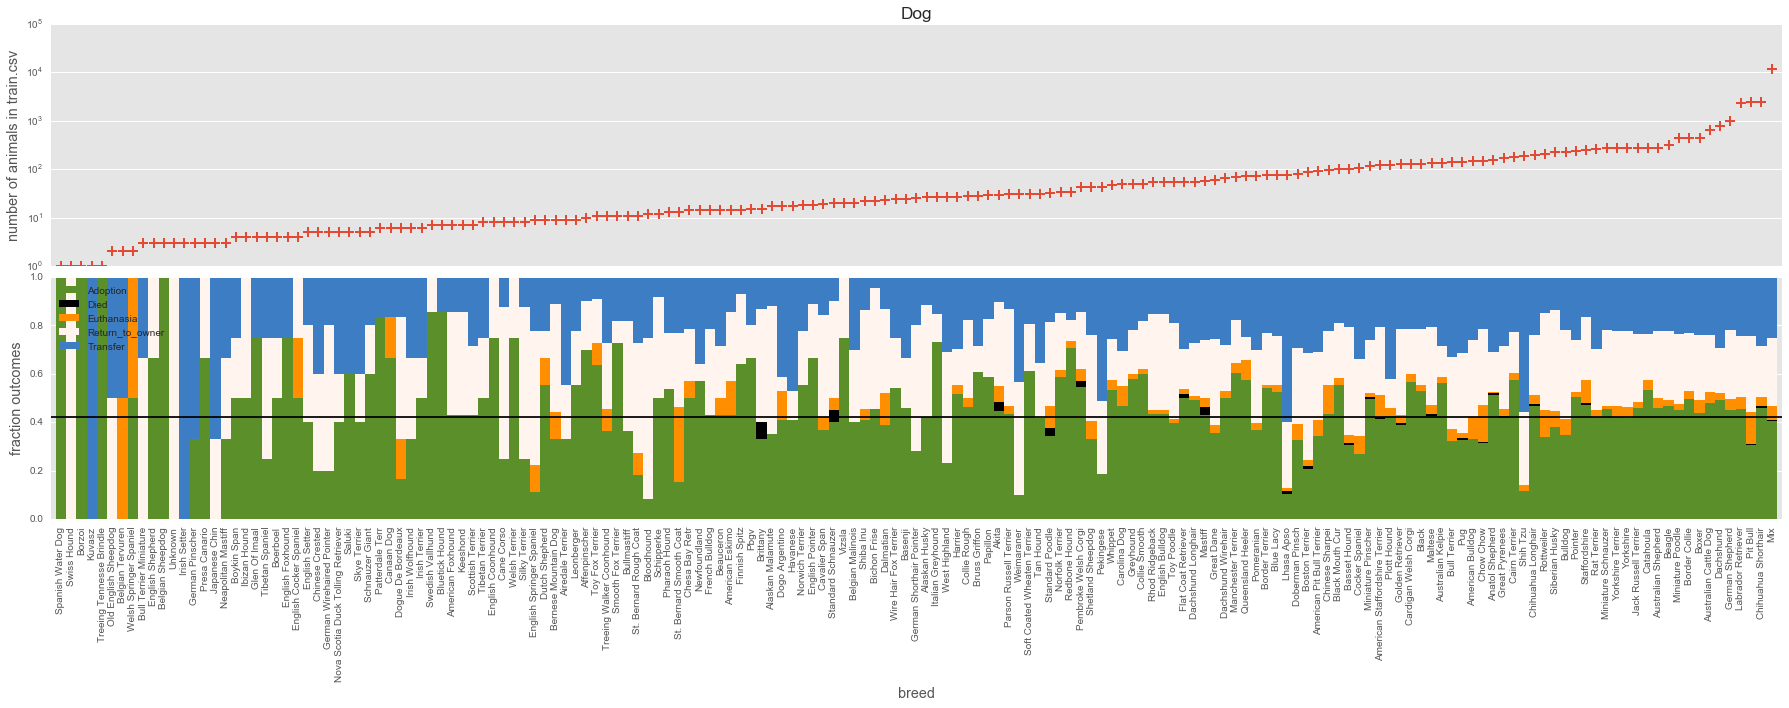

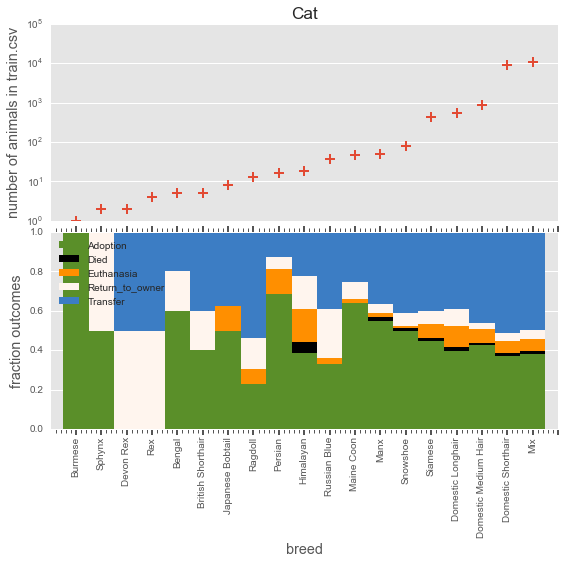

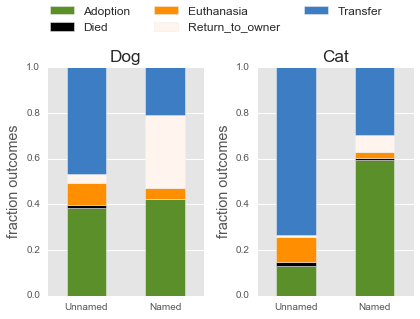

In [20]:
# Question 3: breed vs. outcome?
# Load data
feature = 'Breed'

feature_values_dog = df.loc[df['AnimalType'] == 'Dog',feature]
outcome_dog = df.loc[df['AnimalType'] == 'Dog','OutcomeType']

feature_values_cat = df.loc[df['AnimalType'] == 'Cat',feature]
outcome_cat = df.loc[df['AnimalType'] == 'Cat','OutcomeType']
# collect unique breeds:
# split up mixed breeds and merge the sublists
feature_values = [i.split('/') for i in feature_values_dog]
feature_values = [j for i in feature_values for j in i]
# remove 'Mix' from the strings, but add it as a unique element
feature_values = [i == i[:-4] if i[-3:] == 'Mix' else i for i in feature_values]
feature_values = feature_values + ['Mix']
unique_breeds_dog = np.unique(feature_values)

# same for cats
feature_values = [i.split('/') for i in feature_values_cat]
feature_values = [j for i in feature_values for j in i]
# remove 'Mix' from the strings, but add it as a unique element
feature_values = [i == i[:-4] if i[-3:] == 'Mix' else i for i in feature_values]
feature_values = feature_values + ['Mix']
unique_breeds_cat = np.unique(feature_values)

# unique outcomes:
unique_outcomes = np.unique(np.append(outcome_dog,outcome_cat))

# arrays to fill
fractions_cat = np.zeros([len(unique_breeds_cat),len(unique_outcomes)])
fractions_dog = np.zeros([len(unique_breeds_dog),len(unique_outcomes)])
nr_animals_with_breed_dog = np.zeros(len(unique_breeds_dog))
nr_animals_with_breed_cat = np.zeros(len(unique_breeds_cat))

for i in range(len(unique_breeds_dog)):
    sublist_dog = outcome_dog[[unique_breeds_dog[i] in x for x in feature_values_dog]]
    
    for j in range(len(unique_outcomes)):
        if len(sublist_dog) > 0:
            fractions_dog[i,j] = 1e0*len(sublist_dog[sublist_dog == unique_outcomes[j]]) / len(sublist_dog)
        else:
            fractions_dog[i,j] = 0e0
    nr_animals_with_breed_dog[i] = len(sublist_dog)
    
for i in range(len(unique_breeds_cat)):
    sublist_cat = outcome_cat[[unique_breeds_cat[i] in x for x in feature_values_cat]]
    for j in range(len(unique_outcomes)):
        if len(sublist_cat) > 0:
            fractions_cat[i,j] = 1e0*len(sublist_cat[sublist_cat == unique_outcomes[j]]) / len(sublist_cat)
        else:
            fractions_cat[i,j] = 0e0
    nr_animals_with_breed_cat[i] = len(sublist_cat)

# sort the dog and cat fractions with respect to nr. of animals in train.csv
indcs_dog = np.argsort(nr_animals_with_breed_dog)
fractions_dog = fractions_dog[indcs_dog]

indcs_cat = np.argsort(nr_animals_with_breed_cat)
fractions_cat = fractions_cat[indcs_cat]
# plot figures

plt.figure(figsize=(25,10))

plt.subplot(2,1,1)
plt.title('Dog')
plt.yscale('log')
plt.xticks([])
plt.xlim([0,len(unique_breeds_dog)])
plt.plot(range(len(unique_breeds_dog)),nr_animals_with_breed_dog[indcs_dog],'+',markersize=10,mew=2)
plt.ylabel('number of animals in train.csv')
plt.tick_params(axis='x', length=6, which='major',width=2)
plt.tick_params(axis='x', length=4, which='minor',width=1)
plt.minorticks_on()

plt.subplot(2,1,2)
plt.xlabel('breed')
plt.ylabel('fraction outcomes')
plt.xlim([0,len(unique_breeds_dog)])
plt.ylim([0,1])
plt.plot(np.arange(len(unique_breeds_dog)+2),np.zeros(len(unique_breeds_dog)+2)+np.average(fractions_dog[:,0],weights = nr_animals_with_breed_dog[indcs_dog]),'k')
plt1 = plt.bar(np.arange(len(unique_breeds_dog))-0.5, fractions_dog[:,0], 1,color='#5A8F29',edgecolor='none')
plt2 = plt.bar(np.arange(len(unique_breeds_dog))-0.5, fractions_dog[:,1], 1,color='k',bottom = np.sum(fractions_dog[:,:1],axis=1),edgecolor='none')
plt3 = plt.bar(np.arange(len(unique_breeds_dog))-0.5, fractions_dog[:,2], 1,color='#FF8F00',bottom = np.sum(fractions_dog[:,:2],axis=1),edgecolor='none')
plt4 = plt.bar(np.arange(len(unique_breeds_dog))-0.5, fractions_dog[:,3], 1,color='#FFF5EE',bottom = np.sum(fractions_dog[:,:3],axis=1),edgecolor='none')
plt5 = plt.bar(np.arange(len(unique_breeds_dog))-0.5, fractions_dog[:,4], 1,color='#3C7DC4',bottom = np.sum(fractions_dog[:,:4],axis=1),edgecolor='none')
plt.xticks(np.arange(len(unique_breeds_dog))+1, unique_breeds_dog[indcs_dog[1:]], rotation=90)
plt.legend([plt1,plt2,plt3,plt4,plt5],unique_outcomes,loc=2,fontsize=10)
plt.tight_layout(w_pad=0, h_pad=0)
plt.savefig('breed-vs-outcome_dog.jpg',dpi=150)
plt.show()
plt.close()


plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
plt.title('Cat')
plt.yscale('log')
plt.xticks([])
plt.xlim([0,len(unique_breeds_cat)])
plt.plot(range(len(unique_breeds_cat)),nr_animals_with_breed_cat[indcs_cat[0:]],'+',markersize=10,mew=2)
plt.ylabel('number of animals in train.csv')
plt.tight_layout(w_pad=0, h_pad=0)

plt.subplot(2,1,2)
plt.xlabel('breed')
plt.ylabel('fraction outcomes')
plt.xlim([0,len(unique_breeds_cat)])
plt.ylim([0,1])
plt1 = plt.bar(np.arange(len(unique_breeds_cat))-0.5, fractions_cat[:,0], 1,color='#5A8F29',edgecolor='none')
plt2 = plt.bar(np.arange(len(unique_breeds_cat))-0.5, fractions_cat[:,1], 1,color='k',bottom = np.sum(fractions_cat[:,:1],axis=1),edgecolor='none')
plt3 = plt.bar(np.arange(len(unique_breeds_cat))-0.5, fractions_cat[:,2], 1,color='#FF8F00',bottom = np.sum(fractions_cat[:,:2],axis=1),edgecolor='none')
plt4 = plt.bar(np.arange(len(unique_breeds_cat))-0.5, fractions_cat[:,3], 1,color='#FFF5EE',bottom = np.sum(fractions_cat[:,:3],axis=1),edgecolor='none')
plt5 = plt.bar(np.arange(len(unique_breeds_cat))-0.5, fractions_cat[:,4], 1,color='#3C7DC4',bottom = np.sum(fractions_cat[:,:4],axis=1),edgecolor='none')
plt.legend([plt1,plt2,plt3,plt4,plt5],unique_outcomes,loc=2,fontsize=10)
plt.xticks(np.arange(len(unique_breeds_cat))+1, unique_breeds_cat[indcs_cat[1:]], rotation=90)
plt.tick_params(axis='x', length=6, which='major',width=2)
plt.tick_params(axis='x', length=4, which='minor',width=1)
plt.minorticks_on()
plt.tight_layout(w_pad=0, h_pad=0)
plt.savefig('breed-vs-outcome_cat.jpg',dpi=150)
plt.show()
plt.close()
# - Some small dogs (e.g., Shin Tzus, Lhasa Apsos, Pekingese) have a very low adoption probability (~10% while the average is ~40%). 
# - Dogs percieved agressive (Pit Bulls, Bull Dogs, Siberian Huskies, Rottweilers) also have a lower than average adoption probability (~30%).
# 
# The black line on breed-vs-outcome_dog shows the weighted average adoption probability.
# check the name feature vs outcomes

feature = 'Name'

feature_values_dog = df.loc[df['AnimalType'] == 'Dog',feature]
outcome_dog = df.loc[df['AnimalType'] == 'Dog','OutcomeType']
outcome_dog = np.array(outcome_dog)

feature_values_cat = df.loc[df['AnimalType'] == 'Cat',feature]
outcome_cat = df.loc[df['AnimalType'] == 'Cat','OutcomeType']
outcome_cat = np.array(outcome_cat)

# unique outcomes:
unique_outcomes = np.unique(outcome_dog)

fraction_outcomes_cat = np.zeros([2,5])
fraction_outcomes_dog = np.zeros([2,5])


for i in range(len(unique_outcomes)):
    cat_noname = np.sum(feature_values_cat[outcome_cat == unique_outcomes[i]].isnull())
    cat_with_name = np.sum(feature_values_cat[outcome_cat == unique_outcomes[i]].notnull())
    dog_noname = np.sum(feature_values_dog[outcome_dog == unique_outcomes[i]].isnull())
    dog_with_name = np.sum(feature_values_dog[outcome_dog == unique_outcomes[i]].notnull())
    
    fraction_outcomes_cat[0,i] = 1e0*cat_noname/np.sum(feature_values_cat.isnull())
    fraction_outcomes_cat[1,i] = 1e0*cat_with_name/np.sum(feature_values_cat.notnull())

    fraction_outcomes_dog[0,i] = 1e0*dog_noname/np.sum(feature_values_dog.isnull())
    fraction_outcomes_dog[1,i] = 1e0*dog_with_name/np.sum(feature_values_dog.notnull())

# plot
plt.figure(figsize=(6,4))

plt.subplot(1, 2, 1)
plt.title('Dog')
plt.ylabel('fraction outcomes')
plt.xlim([-0.5,1.5])
plt1 = plt.bar(np.arange(2)-0.25, fraction_outcomes_dog[:,0], 0.5,color='#5A8F29')
plt2 = plt.bar(np.arange(2)-0.25, fraction_outcomes_dog[:,1], 0.5,color='k',bottom = np.sum(fraction_outcomes_dog[:,:1],axis=1))
plt3 = plt.bar(np.arange(2)-0.25, fraction_outcomes_dog[:,2], 0.5,color='#FF8F00',bottom = np.sum(fraction_outcomes_dog[:,:2],axis=1))
plt4 = plt.bar(np.arange(2)-0.25, fraction_outcomes_dog[:,3], 0.5,color='#FFF5EE',bottom = np.sum(fraction_outcomes_dog[:,:3],axis=1))
plt5 = plt.bar(np.arange(2)-0.25, fraction_outcomes_dog[:,4], 0.5,color='#3C7DC4',bottom = np.sum(fraction_outcomes_dog[:,:4],axis=1))
plt.xticks(range(2), ['Unnamed','Named'], rotation=0)

plt.subplot(1, 2, 2)
plt.title('Cat')
plt.ylabel('fraction outcomes')
plt.xlim([-0.5,1.5])
plt1 = plt.bar(np.arange(2)-0.25, fraction_outcomes_cat[:,0], 0.5,color='#5A8F29')
plt2 = plt.bar(np.arange(2)-0.25, fraction_outcomes_cat[:,1], 0.5,color='k',bottom = np.sum(fraction_outcomes_cat[:,:1],axis=1))
plt3 = plt.bar(np.arange(2)-0.25, fraction_outcomes_cat[:,2], 0.5,color='#FF8F00',bottom = np.sum(fraction_outcomes_cat[:,:2],axis=1))
plt4 = plt.bar(np.arange(2)-0.25, fraction_outcomes_cat[:,3], 0.5,color='#FFF5EE',bottom = np.sum(fraction_outcomes_cat[:,:3],axis=1))
plt5 = plt.bar(np.arange(2)-0.25, fraction_outcomes_cat[:,4], 0.5,color='#3C7DC4',bottom = np.sum(fraction_outcomes_cat[:,:4],axis=1))
plt.xticks(range(2), ['Unnamed','Named'], rotation=0)

plt.figlegend([plt1,plt2,plt3,plt4,plt5],unique_outcomes,loc='center',fontsize=12,bbox_to_anchor=(0.5, 1.04),
          ncol=3, fancybox=True, shadow=True)

plt.tight_layout()
plt.savefig('outcome-vs-name.jpg',bbox_inches='tight',dpi=150)
plt.show()
plt.close()

このグラフから以下の内容が読み取れます。

⇒ [動物の品種]と結末に関連性がある。

⇒ [名前の有無]と結末に関連性がある。

今までのグラフから、下記の項目が [結末と関連性のある要素] だと判断できます。

・[動物の種類]

・[動物の年齢]

・[動物の品種]

・[去勢手術の有無]

・[名前の有無]

以上の項目を説明変数として定義し、結末を目的変数としてデータを人工知能に学習させます。

[3.機械学習]

今回は決定木(decidion tree)という予測モデルを利用します。

予測モデルに決定木を採用する理由としては、以下3点が挙げられます。

・データの標準化 (正規化) やダミー変数の作成などの手間がほとんど不要
・他の予測モデルと比較し、分岐のアルゴリズムを解釈することが容易
・予測結果の検定を行うことで、作成したモデルの精度を評価できる


モデルの学習にあたって、説明変数は全て数値で定義する必要があります。

サンプルデータの説明変数に採用する項目に対し、文字列を分類して数値変換する関数を作成します。

決定木については下記のサイトが参考になります。

http://codecrafthouse.jp/machine-learning/decision-tree

http://www.slideshare.net/mitsuoshimohata/ss-35949886?next_slideshow=2￥

In [21]:
#学習用のサンプルデータ
train = pd.read_csv('./train.csv')
train.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black
26728,A706629,NaN,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White


今回はデータの学習に下記の項目を使用します。

・[Name]
・[AnimalType]
・[SexuponOutcome]
・[AgeuponOutcome]
・[Breed]

また、以下の項目は不要とし、DataFrameから削除します。

・[AnimalID]
・[DateTime]
・[OutcomeSubtype]
・[Color]

In [22]:
#今回の学習に不要な項目を除去
train = train.drop(['AnimalID','DateTime','OutcomeSubtype','Color'],axis = 1)
train.tail()

,Name,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed
26724,NaN,Transfer,Cat,Intact Male,1 month,Domestic Shorthair Mix
26725,NaN,Transfer,Cat,Spayed Female,3 months,Domestic Shorthair Mix
26726,Zeus,Adoption,Dog,Neutered Male,4 years,Old English Bulldog Mix
26727,NaN,Transfer,Cat,Intact Male,4 weeks,Domestic Shorthair Mix
26728,NaN,Transfer,Cat,Intact Male,1 year,Domestic Shorthair Mix


以下にデータを数値変換する関数を定義します。

In [23]:
#名前の有無を判定する関数
def hasName(Str):
    if(pd.isnull(Str)):
        #print(Str)
        return 0
    
    else:
        #print(Str)
        return 1

#犬か猫かを判定する関数
def Divide_AnimalType(Str):
    if('Dog' in Str):
        return 0
    
    elif('Cat' in Str):
        return 1
    
    else:
        print("Unexpected Argument")
        print(Str)
        return 9
    
    
#去勢手術の有無を判定する関数
def isNeutered(Float):

    #convert Float argument to String argument
    Str = str(Float)

    if('Intact' in Str):
        return 0

    elif('Neutered' in Str):
        return 1

    elif('Spayed' in Str):
        return 1

    elif('Unknown' in Str):
        return 2


    #Null_Check
    elif(pd.isnull(Str)):
        #print("find null")
        return 2

    elif(Str == 'nan'):
        #print("find nan")
        return 2


    else:
        print("Unexpected Argument")
        print(Str)
        return 9

    
#年齢を判定する関数
#変換用
def Calc_Age_in_Years(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age 
    if x.find('month')> -1: return age / 12.
    if x.find('week')> -1: return age / 52.
    if x.find('day')> -1: return age / 365.
    else: return 0

#分類用
def Calc_Age_Category(x):
    #生後１か月 ≒ 0.085 year
    if x < 0.085: return 0 #'baby'
    if x < 1: return 1     #'child'
    if x < 3: return 2     #'young'
    if x < 5: return 3     #'young adult'
    if x < 10: return 4    #'adult'
    if x < 15: return 5    #'old'
    return            6    #'realy old'

#品種については下記のサイトを参考に分類しました。
#https://www.min-inuzukan.com/
#品種を分類する関数
def Divide_Breed(Float):
    Str = str(Float)
    
    #Herding_Dog_牧羊犬
    if(Str.find('Corgi')!=-1):
        return 1
    elif(Str.find('Pembroke')!=-1):
        return 1
    elif(Str.find('Border collie')!=-1):
        return 1
    elif(Str.find('Shetland Sheepdog')!=-1):
        return 1
    elif(Str.find('Australian Cattle')!=-1):
        return 1
    elif(Str.find('Australian Kelpie')!=-1):
        return 1
    elif(Str.find('Australian Shepherd')!=-1):
        return 1
    elif(Str.find('Bearded Collie')!=-1):
        return 1
    elif(Str.find('Beauceron')!=-1):
        return 1
    elif(Str.find('Belgian Malinois')!=-1):
        return 1
    elif(Str.find('Blue Lacy')!=-1):
        return 1
    elif(Str.find('Pembroke')!=-1):
        return 1
    

    #Watch_Dog_番犬
    elif(Str.find('Boerboel')!=-1):
        return 2
    elif(Str.find('Great Pyrenees')!=-1):
        return 2
    elif(Str.find('Doberman Pinsch')!=-1):
        return 2
    elif(Str.find('Mastiff')!=-1):
        return 2
    elif(Str.find('mastiff')!=-1):
        return 2
    elif(Str.find('Great Dane')!=-1):
        return 2
    elif(Str.find('Boxer')!=-1):
        return 2
    elif(Str.find('Bull')!=-1):
        return 2
    elif(Str.find('bull')!=-1):
        return 2
    elif(Str.find('Staffordshire')!=-1):
        return 2
    elif(Str.find('Cane Corso')!=-1):
        return 2
    
    
    #Terrier_テリア
    elif(Str.find('Terrier')!=-1):
        return 3
    elif(Str.find('West Highland')!=-1):
        return 3
    elif(Str.find('Affenpinscher')!=-1):
        return 3
    

    #Dachshund_ダックスフンド
    elif(Str.find('Dachshund')!=-1):
        return 4

    
    #Japanese_Dog_日本の犬種
    elif(Str.find('Shiba')!=-1):
        return 5
    elif(Str.find('Akita')!=-1):
        return 5
    elif(Str.find('Japanese')!=-1):
        return 5
    
    
    #Husky_ハスキー犬
    elif(Str.find('Siberian Husky')!=-1):
        return 6
    elif(Str.find('Alaskan Husky')!=-1):
        return 6
    elif(Str.find('Alaskan Malamute')!=-1):
        return 6
    

    
    #Spitz_スピッツ
    elif(Str.find('Spitz')!=-1):
        return 7
    elif(Str.find('American Eskimo')!=-1):
        return 7
    

    #Hound_ハウンド
    elif(Str.find('Hound')!=-1):
        return 8
    elif(Str.find('hound')!=-1):
        return 8
    elif(Str.find('Whippet')!=-1):
        return 8
    elif(Str.find('Catahoula')!=-1):
        return 8
    
    
    #Hunter_Dog_狩猟犬
    elif(Str.find('Basenji')!=-1):
        return 9
    elif(Str.find('Pointer')!=-1):
        return 9
    elif(Str.find('Weimaraner')!=-1):
        return 9
    elif(Str.find('Black Mouth Cur')!=-1):
        return 9
    
    #Miniature_型犬
    elif(Str.find('Bichon Frise')!=-1):
        return 10
    elif(Str.find('Maltese')!=-1):
        return 10
    elif(Str.find('Standard Poodle')!=-1):
        return 10
    elif(Str.find('Miniature')!=-1):
        return 10
    elif(Str.find('Papillon')!=-1):
        return 10
    elif(Str.find('Pekingese')!=-1):
        return 10
    elif(Str.find('Miniature')!=-1):
        return 10
    elif(Str.find('Chihuahua')!=-1):
        return 10
     
    
    #その他の雑種
    elif('Mix' in Str):
        return 0
    
    
    #Other_他
    else:
        #print("Other")
        #print(Str)
        return 99

In [24]:
#関数を適用し、戻り値として得られた数値を新しい列として追加
train["hasName"] = train["Name"].apply(hasName)
train["isNeutered"] = train["SexuponOutcome"].apply(isNeutered)
train["AnimalType_Number"] = train["AnimalType"].apply(Divide_AnimalType)
train['AgeInYears'] = train.AgeuponOutcome.apply(Calc_Age_in_Years)
train['Age_Category'] = train.AgeInYears.apply(Calc_Age_Category)
train['Breed_Number'] = train.Breed.apply(Divide_Breed)

In [25]:
train.head(10)

,Name,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,hasName,isNeutered,AnimalType_Number,AgeInYears,Age_Category,Breed_Number
0,Hambone,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,1,1,0,1.000000,2,1
1,Emily,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,1,1,1,1.000000,2,0
2,Pearce,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,1,1,0,2.000000,2,2
3,NaN,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,0,0,1,0.057692,0,0
4,NaN,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,0,1,0,2.000000,2,10
5,Elsa,Transfer,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,1,0,0,0.083333,0,3
6,Jimmy,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,1,0,1,0.057692,0,0
7,NaN,Transfer,Cat,Unknown,3 weeks,Domestic Shorthair Mix,0,2,1,0.057692,0,0
8,Lucy,Adoption,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,1,1,0,0.416667,1,2
9,NaN,Adoption,Dog,Spayed Female,1 year,Cairn Terrier,0,1,0,1.000000,2,3


In [26]:
#学習に必要な説明変数をtargetに代入
target = train.OutcomeType.values

#予測モデルの学習に不要な項目を削除
train = train.drop(['Name','AnimalType','SexuponOutcome','AgeuponOutcome','Breed','AgeInYears','OutcomeType'],axis=1)
train.head(10)

,hasName,isNeutered,AnimalType_Number,Age_Category,Breed_Number
0,1,1,0,2,1
1,1,1,1,2,0
2,1,1,0,2,2
3,0,0,1,0,0
4,0,1,0,2,10
5,1,0,0,0,3
6,1,0,1,0,0
7,0,2,1,0,0
8,1,1,0,1,2
9,0,1,0,2,3


上記の項目を学習対象の参照変数とします。

In [27]:
target

array(['Return_to_owner', 'Euthanasia', 'Adoption', ..., 'Adoption',
       'Transfer', 'Transfer'], dtype=object)

上記が各列に対応した結末、目的変数です。
以上2種類のデータを元に、予測モデルに学習させます。

In [28]:
#予測モデル(決定木)が利用できるライブラリをインポート
from sklearn import tree

# 予測モデルを作成
# 引数に
model = tree.DecisionTreeClassifier(max_depth=3)

# 予測モデルにサンプルデータを学習させる
# 説明変数は [hasName] [isNeutered ][AnimalType_Number][Age_Category] [Breed_Number]を格納したtrain
# 目的変数は[OutcomeType]を格納したtarget
model = model.fit(train, target)

In [29]:
# 学習した結果をグラフ描画ソフトGraphvizが認識できる形式にして出力する
with open('graph.dot', 'w') as f:
    f = tree.export_graphviz(model, out_file=f)

今回作成した決定木の構造を描画します。
![graph.dot](https://i.imgur.com/wC2H58C.jpg)

![graph_view](https://i.imgur.com/dOL5YkA.jpg)

作成したグラフの描画については下記のサイトを参考にしました。

http://qiita.com/rubytomato@github/items/51779135bc4b77c8c20d

In [30]:
#予測対象のデータを、学習させたモデルが解釈できるように編集します。
test = pd.read_csv('./test.csv')

test["hasName"] = test["Name"].apply(hasName)
test["AnimalType_Number"] = test["AnimalType"].apply(Divide_AnimalType)
test["isNeutered"] = test["SexuponOutcome"].apply(isNeutered)
test['AgeInYears'] = test.AgeuponOutcome.apply(Calc_Age_in_Years)
test['Age_Category'] = test.AgeInYears.apply(Calc_Age_Category)
test['Breed_Number'] = test.Breed.apply(Divide_Breed)

test = test.drop(['ID','Name','DateTime','AnimalType','SexuponOutcome','AgeuponOutcome','Breed','Color','AgeInYears'],axis=1)
test.head()

,hasName,AnimalType_Number,isNeutered,Age_Category,Breed_Number
0,1,0,0,1,0
1,1,0,1,2,6
2,1,1,1,2,0
3,1,0,0,1,0
4,1,0,1,2,10


In [31]:
#予測モデルに対象のデータを読み込ませます
predicted = np.array(model.predict_proba(test))

In [32]:
#予測結果をCSVファイルに出力します。
labels = ['ID']

#データ圧縮用ライブラリをインポート
import gzip,csv

for i in model.classes_:
    labels.append(i)
with gzip.open('Shelter_Animal_Outcome.csv.gz', 'wt') as outf:
    fo = csv.writer(outf, lineterminator='\n')
    fo.writerow(labels)
            
    for i, pred in enumerate(predicted):
        fo.writerow([i] + list(pred))

これで、学習させた結果が出力されました。
Kaggleに提出し、データの精度を検証します。

精度が高い順に、ランキングに反映されます。
![Kaggle_Rank_Shelter_Animal_Outcome_TopScore](https://i.imgur.com/utTYnGC.jpg)

![Kaggle_Rank_Shelter_Animal_Outcome_MyScore](https://i.imgur.com/TOhnnKm.jpg)

560位でした。

足切りのボーダーラインは超えたみたいです。

もっと高い精度の分類モデルを作成し、次回挑戦するときはより良いスコアを出せるように学習を続けます。